In [1]:
import glob
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
model_to_index = {
    'falcon-40b': 0,
    'falcon-40b-lang-1': 1,
    'falcon-40b-lang-10': 2,
    'falcon-40b-lang-45': 3,
    'falcon-7b': 4,
    'falcon-7b-lang-1': 5,
    'falcon-7b-lang-2': 6,
    'falcon-7b-lang-3': 7,
    'falcon-7b-lang-5': 8,
    'falcon-7b-lang-10': 9,
    'falcon-7b-lang-20': 10,
    'falcon-7b-lang-45': 11
}

model_to_color = {
    'falcon-40b': 'gray',
    'falcon-40b-lang-1': 'gray',
    'falcon-40b-lang-10': 'gray',
    'falcon-40b-lang-45': 'gray',
    'falcon-7b': 'g',
    'falcon-7b-lang-1': 'g',
    'falcon-7b-lang-2': 'g',
    'falcon-7b-lang-3': 'g',
    'falcon-7b-lang-5': 'g',
    'falcon-7b-lang-10': 'g',
    'falcon-7b-lang-20': 'g',
    'falcon-7b-lang-45': 'g'
}

# Check NLU Per Dataset

In [3]:
dfs = []
for path in glob.glob('metrics_nlu/*.csv'):
    model = path[:-4].split('_')[-1]
    if 'falcon' not in model or 'lang' not in model:
        continue
        
    lang = path.split('results')[1].split('_')[1]
    df = pd.read_csv(path).set_index('index')
    df['accuracy'] = df['accuracy'].astype(float) * 100
    df['macro_f1_score'] = df['macro_f1_score'].astype(float) * 100
    df['weighted_f1_score'] = df['weighted_f1_score'].astype(float) * 100
    df['model'] = model
    df['model_index'] = model_to_index[model]
    df['lang'] = lang
    dfs.append(df)
df = pd.concat(dfs)

In [4]:
df.shape, df.dropna().shape

((110, 16), (110, 16))

In [5]:
df = df.dropna()

In [6]:
df[(df['lang'] == 'eng') & (~df['dataset'].str.contains('qnli'))].groupby(['model', 'lang'])[['accuracy', 'macro_f1_score', 'weighted_f1_score']].mean().sort_values(['model','weighted_f1_score'])

,,accuracy,macro_f1_score,weighted_f1_score
model,lang,,,
falcon-40b-lang-1,eng,50.046113,40.324073,40.542766
falcon-40b-lang-10,eng,48.984290,38.094873,39.264421
falcon-40b-lang-45,eng,51.877461,42.902987,44.661515
falcon-7b-lang-1,eng,48.847527,38.585985,39.440671
falcon-7b-lang-10,eng,48.730588,38.250758,38.906228
falcon-7b-lang-2,eng,51.171265,41.138630,42.779865
falcon-7b-lang-20,eng,51.997456,39.649189,41.254611
falcon-7b-lang-3,eng,49.210774,38.489950,39.056284
falcon-7b-lang-45,eng,50.637149,41.661907,42.244867


/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_dat

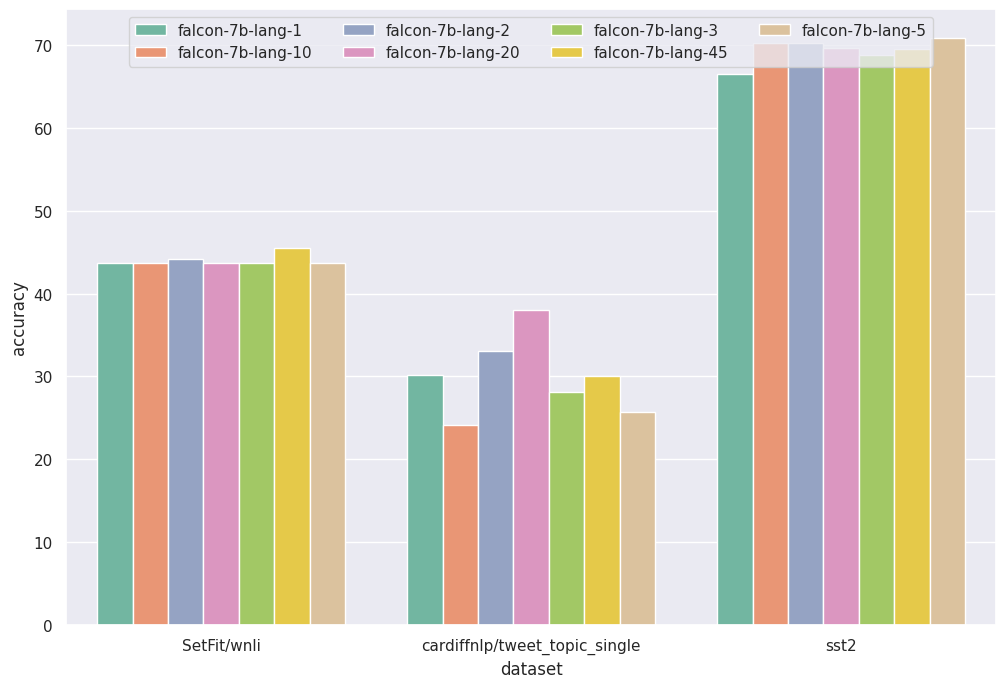

In [7]:
sns.set(rc={'figure.figsize':(12,8)})
pdf = df.loc[(df['model'].str.contains('7b')) & (~df['dataset'].str.contains('qnli'))].sort_values('model_index').groupby(['dataset', 'model'])['accuracy'].mean().reset_index()
sns.barplot(data=pdf, x='dataset', y='accuracy', hue='model', palette='Set2')
plt.legend(ncols=4, loc='upper center')
plt.show()

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_dat

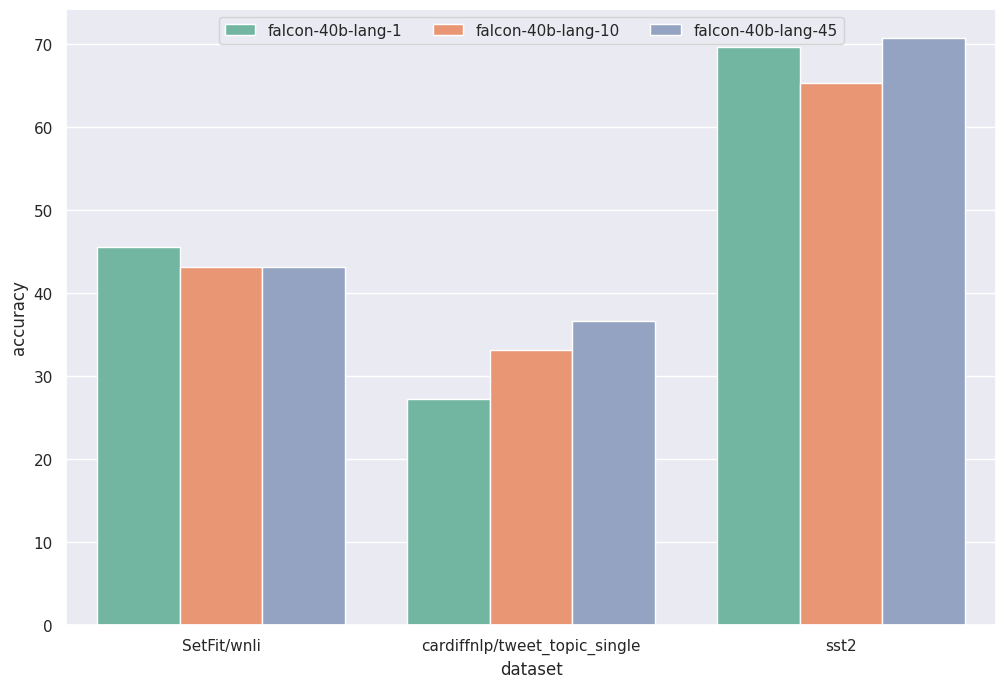

In [8]:
pdf = df.loc[(df['model'].str.contains('40b')) & (~df['dataset'].str.contains('qnli'))].sort_values('model_index').groupby(['dataset', 'model'])['accuracy'].mean().reset_index()
sns.barplot(data=pdf, x='dataset', y='accuracy', hue='model', palette='Set2')
plt.legend(ncols=5, loc='upper center')
plt.show()

/tmp/ipykernel_3134266/2788288795.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=pdf, x='model', y='accuracy', palette='coolwarm', k_depth=5)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


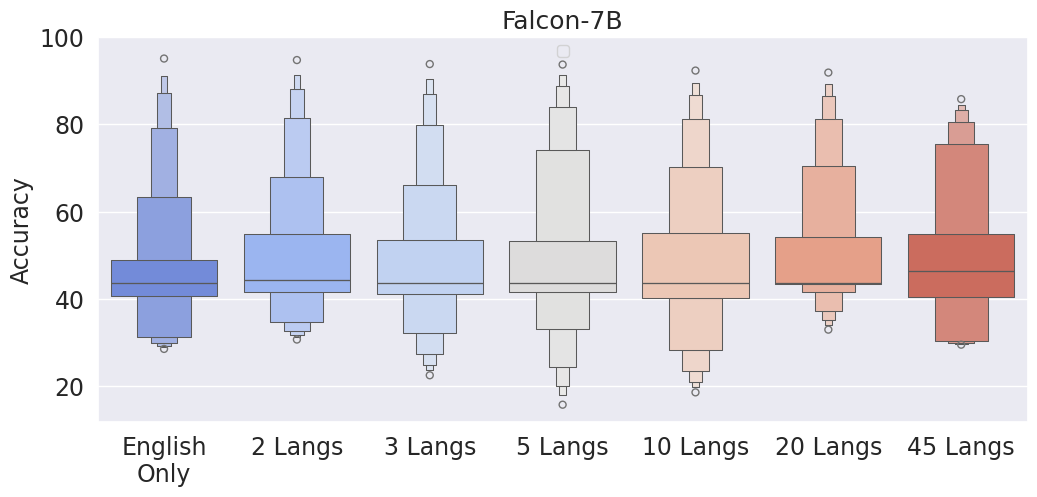

In [13]:
sns.set(rc={'figure.figsize':(12,5)})
pdf = df.loc[(df['model'].str.contains('7b')) & (~df['dataset'].str.contains('qnli'))].sort_values('model_index')
sns.boxenplot(data=pdf, x='model', y='accuracy', palette='coolwarm', k_depth=5)
plt.legend(ncols=4, loc='upper center')
plt.xticks([0,1,2,3,4,5,6], ['English\nOnly', '2 Langs', '3 Langs', '5 Langs', '10 Langs', '20 Langs', '45 Langs'], fontsize=19)
plt.yticks([20, 40, 60, 80, 100],fontsize=19)
plt.xlabel('')
plt.ylabel('Accuracy', fontsize=19)
plt.title('Falcon-7B', fontsize=21)
plt.savefig('nlp_task_7b.pdf', bbox_inches='tight')
plt.show()

/tmp/ipykernel_3134266/3004347878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=pdf, x='model', y='accuracy', palette='coolwarm', k_depth=5)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


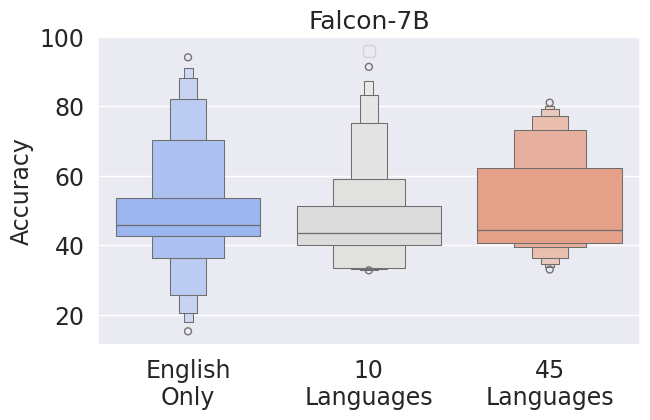

In [15]:
sns.set(rc={'figure.figsize':(7,4)})
pdf = df.loc[(df['model'].str.contains('40b')) & (~df['dataset'].str.contains('qnli'))].sort_values('model_index')
sns.boxenplot(data=pdf, x='model', y='accuracy', palette='coolwarm', k_depth=5)
plt.legend(ncols=4, loc='upper center')
plt.xticks([0,1,2], ['English\nOnly', '10\nLanguages', '45\nLanguages'], fontsize=19)
plt.yticks([20, 40, 60, 80, 100],fontsize=19)
plt.xlabel('')
plt.ylabel('Accuracy', fontsize=19)
plt.title('Falcon-7B', fontsize=21)
plt.savefig('nlp_task_40b.pdf', bbox_inches='tight')
plt.show()

# Check ChatGPT Eval

In [500]:
dataset_to_name = {
    'sparta_qa_1reasoning': 'SpartQA (1 Reasoning)', 
    'sparta_qa_2reasoning': 'SpartQA (2 Reasoning)', 
    'timedial': 'Timedial',
    'pep_3k': 'Pep-3k', 
    'step_game_basic': 'StepGame (k=1)',
    'step_game_hard': 'StepGame (k=9)',
    'babi15': 'bAbI task 15',
    'babi16': 'bAbI task 16',
    'alpha_nli': 'αNLI',
    'clutrr': 'CLUTRR',
    'commonsenseqa': 'CommonsenseQA',
    'ecare': 'E-Care',
    'covid_fact_scientific': 'COVID-Scientific',
    'covid_fact_social': 'COVID-Social',
}

dataset_to_reasoning_type = {
    'babi15': 'Deductive',
    'babi16': 'Inductive',
    'clutrr': 'Inductive',
    'step_game_basic': 'Spatial',
    'step_game_hard': 'Spatial',
    'pep_3k': 'Commonsense',
    'alpha_nli': 'Abductive',
    'timedial': 'Temporal',
    'sparta_qa_1reasoning': 'Spatial',
    'sparta_qa_2reasoning': 'Spatial',
    'commonsenseqa': 'Commonsense',
    'ecare': 'Causal',
    'covid_fact_scientific': 'Fact Checking',
    'covid_fact_social': 'Fact Checking',
}

In [501]:
# dfs = []
# for path in glob.glob('metrics_chatgpt_eval/*.csv'):
#     model = path[:-4].split('_')[-1]
#     if 'falcon' not in model or 'lang' not in model:
#         continue
        
#     lang = path.split('results')[1].split('_')[1]
#     df = pd.read_csv(path).set_index('index')
#     df = df.loc[df['dataset'] != 'ecare',:]
    
#     df['accuracy'] = df['accuracy'].astype(float) * 100
#     df['macro_f1_score'] = df['macro_f1_score'].astype(float) * 100
#     df['weighted_f1_score'] = df['weighted_f1_score'].astype(float) * 100
#     df['model'] = model
#     df['lang'] = lang
#     dfs.append(df)
# df = pd.concat(dfs)
# df = df.loc[~df['dataset'].str.contains('covid'),:]
df = pd.read_csv('chatgpt_eval_metric_final.csv').rename({'task': 'dataset'}, axis='columns')
df['reasoning'] = df['dataset'].apply(lambda x: dataset_to_reasoning_type[x])
df['dset_name'] = df['dataset'].apply(lambda x: dataset_to_name[x])
df['model_index'] = df['model'].apply(lambda x: model_to_index[x])

In [502]:
df.shape, df.dropna().shape

((120, 6), (120, 6))

In [503]:
df.groupby(['reasoning', 'model'])[['accuracy']].mean().reset_index().pivot(index='model', columns='reasoning', values='accuracy')

reasoning,Abductive,Causal,Commonsense,Deductive,Inductive,Spatial,Temporal
model,,,,,,,
falcon-40b-lang-1,0.783589,0.662111,0.640470,0.224,0.458842,0.273703,0.269710
falcon-40b-lang-10,0.735861,0.639491,0.530432,0.227,0.375909,0.279643,0.494467
falcon-40b-lang-45,0.631906,0.614515,0.480653,0.259,0.396228,0.269759,0.251037
falcon-7b-lang-1,0.618830,0.562677,0.393857,0.207,0.358913,0.229519,0.331950
falcon-7b-lang-10,0.525989,0.515080,0.365709,0.216,0.352168,0.234572,0.822960
falcon-7b-lang-2,0.575678,0.511781,0.380768,0.302,0.358476,0.242623,0.483402
falcon-7b-lang-20,0.517489,0.510368,0.348321,0.227,0.324907,0.230032,0.159751
falcon-7b-lang-3,0.516509,0.521678,0.378308,0.240,0.348432,0.240777,0.878976
falcon-7b-lang-45,0.520105,0.518379,0.344772,0.231,0.319146,0.211678,0.271093


In [504]:
df.groupby([ 'model'])[['accuracy']].mean().reset_index()

,model,accuracy
0,falcon-40b-lang-1,0.436071
1,falcon-40b-lang-10,0.419006
2,falcon-40b-lang-45,0.382438
3,falcon-7b-lang-1,0.345339
4,falcon-7b-lang-10,0.371172
5,falcon-7b-lang-2,0.360154
6,falcon-7b-lang-20,0.306766
7,falcon-7b-lang-3,0.381146
8,falcon-7b-lang-45,0.309594
9,falcon-7b-lang-5,0.338552


In [505]:
df.groupby([ 'model'])[['accuracy']].median().reset_index()

,model,accuracy
0,falcon-40b-lang-1,0.372407
1,falcon-40b-lang-10,0.448383
2,falcon-40b-lang-45,0.372018
3,falcon-7b-lang-1,0.328810
4,falcon-7b-lang-10,0.342144
5,falcon-7b-lang-2,0.356746
6,falcon-7b-lang-20,0.264841
7,falcon-7b-lang-3,0.355554
8,falcon-7b-lang-45,0.277309
9,falcon-7b-lang-5,0.339478


In [506]:
mono_falcon_7b_df = df.loc[df['model'] == 'falcon-7b-lang-1', :]
mono_falcon_40b_df = df.loc[df['model'] == 'falcon-40b-lang-1', :]
multi_falcon_7b_df = df.loc[(df['model'] != 'falcon-7b-lang-1') & (df['model'].str.contains('7b')), :]
multi_falcon_40b_df = df.loc[(df['model'] != 'falcon-40b-lang-1') & (df['model'].str.contains('40b')), :]

In [507]:
mono_7b_avg_df = mono_falcon_7b_df.groupby(['reasoning','dataset'])[['accuracy']].mean()
mono_40b_avg_df = mono_falcon_40b_df.groupby(['reasoning','dataset'])[['accuracy']].mean()

In [508]:
multi_falcon_7b_avg_df = multi_falcon_7b_df.groupby(['model', 'reasoning', 'dataset'])[['accuracy']].mean().reset_index()
multi_falcon_40b_avg_df = multi_falcon_40b_df.groupby(['model', 'reasoning', 'dataset'])[['accuracy']].mean().reset_index()

In [509]:
dfs = []
for idx, tdf in multi_falcon_7b_avg_df.groupby('model'):
    tdf = (tdf.set_index(['reasoning','dataset']) - mono_7b_avg_df).reset_index()
    tdf['model'] = idx
    dfs.append(tdf)
multi_falcon_7b_diff_df = pd.concat(dfs)[['model','reasoning','dataset','accuracy']]
multi_falcon_7b_diff_df['model_index'] = multi_falcon_7b_diff_df['model'].apply(lambda x: model_to_index[x])

In [510]:
dfs = []
for idx, tdf in multi_falcon_40b_avg_df.groupby('model'):
    tdf = (tdf.set_index(['reasoning','dataset']) - mono_40b_avg_df).reset_index()
    tdf['model'] = idx
    dfs.append(tdf)
multi_falcon_40b_diff_df = pd.concat(dfs)[['model','reasoning','dataset','accuracy']]
multi_falcon_40b_diff_df['model_index'] = multi_falcon_40b_diff_df['model'].apply(lambda x: model_to_index[x])

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


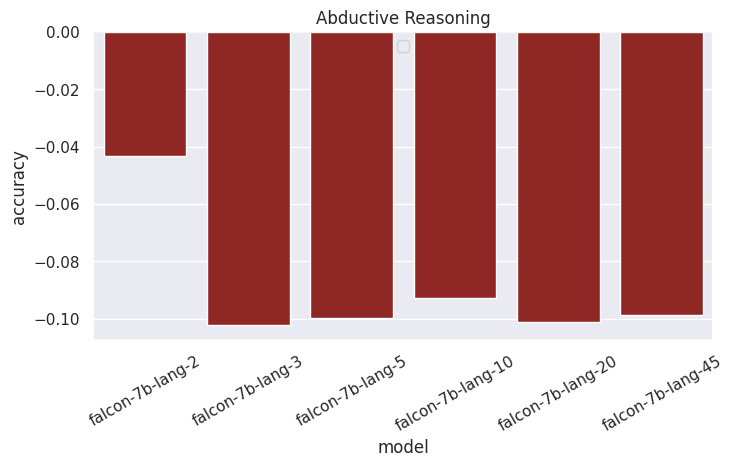

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


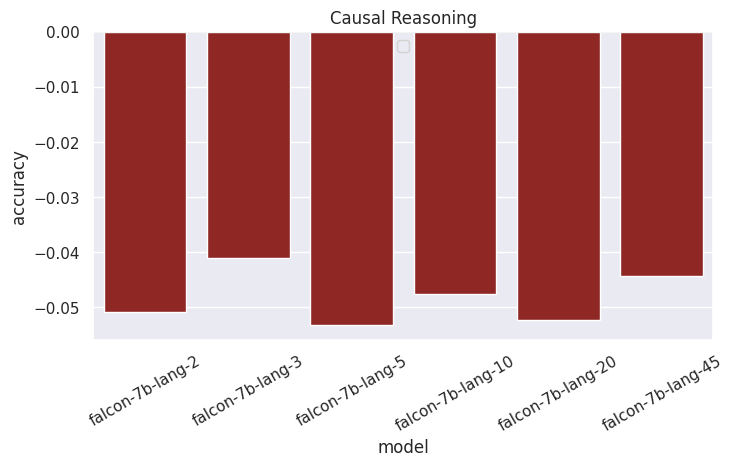

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


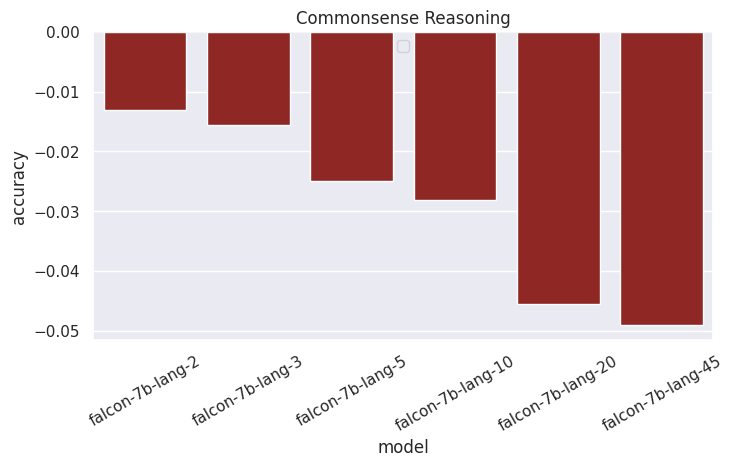

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


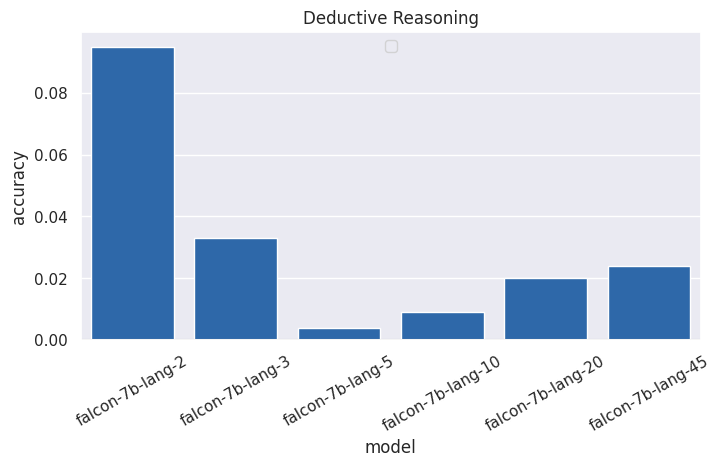

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


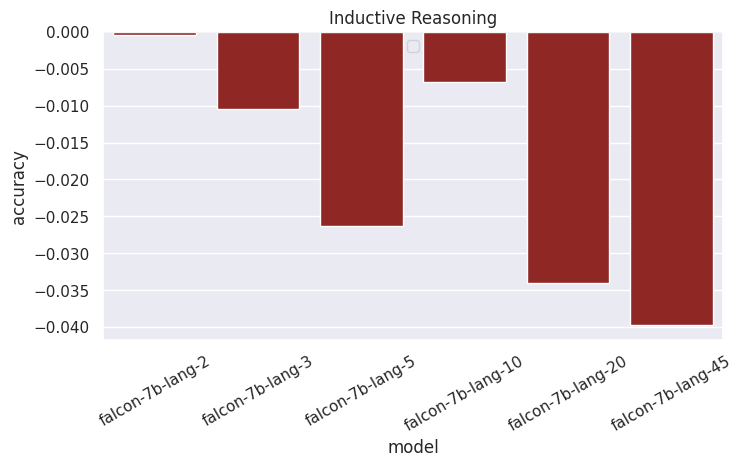

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


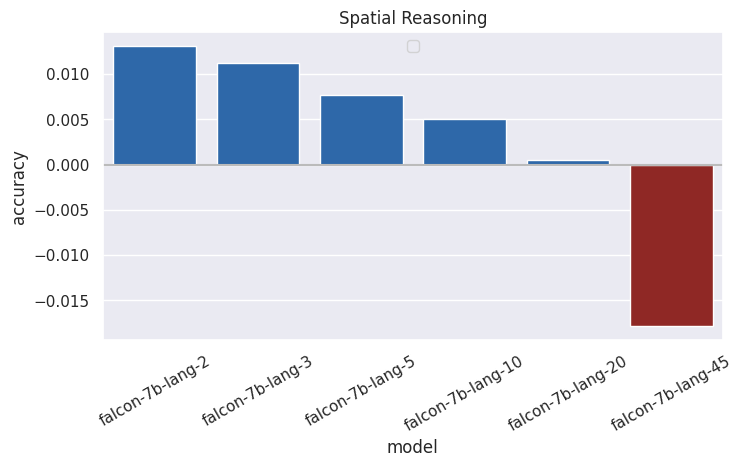

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


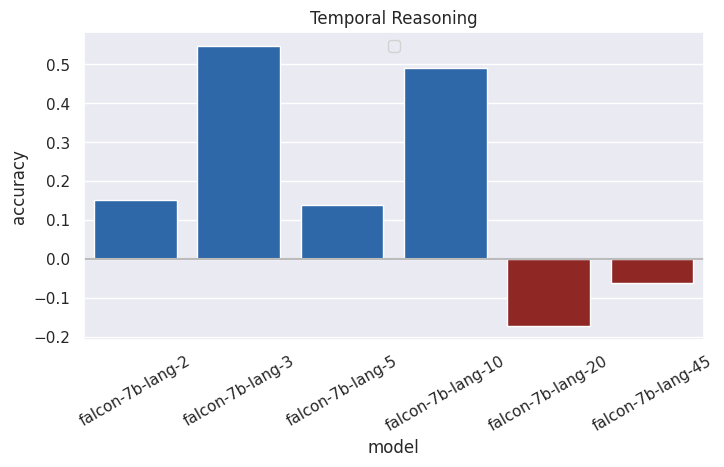

In [511]:
sns.set(rc={'figure.figsize':(8,4)})
for reasoning in multi_falcon_7b_diff_df['reasoning'].unique():
    pdf = multi_falcon_7b_diff_df.loc[
        multi_falcon_7b_diff_df['reasoning'] == reasoning, :
    ].sort_values('model_index').groupby(['model_index','model'])['accuracy'].mean().reset_index()

    pdf['score_type'] = pdf['accuracy'].apply(lambda x: 0 if x < 0 else 1)
    score_types = list(pdf['score_type'].unique())
    colors = (['#a11713'] if 0 in score_types else []) + (['#1a67bd'] if 1 in score_types else [])

    ax = sns.barplot(data=pdf, x='model', y='accuracy', hue='score_type', legend=None, palette=colors)
    ax.axhline(0, ls='-', c='#BBBBBB')
    plt.legend(ncols=4, loc='upper center')
    plt.xticks(rotation=30)
    plt.title(f'{reasoning} Reasoning')
    plt.show()

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


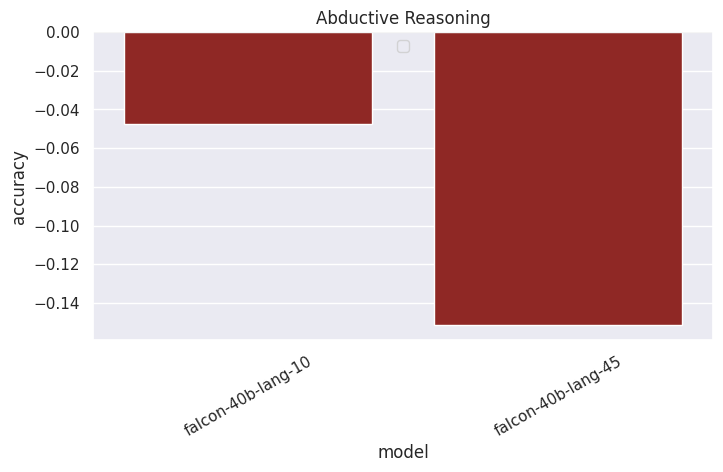

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


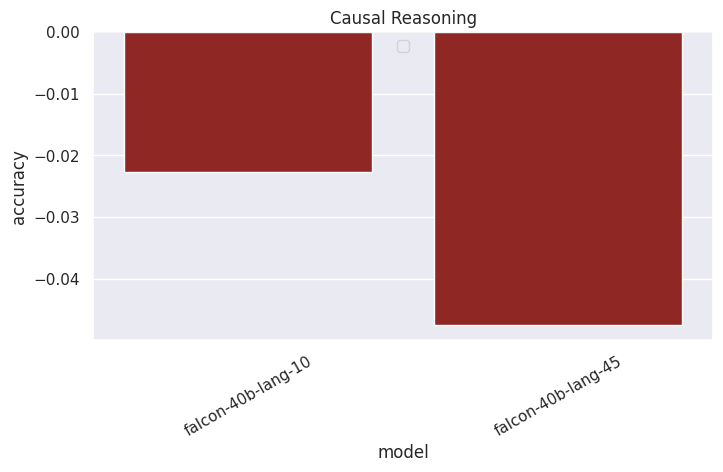

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


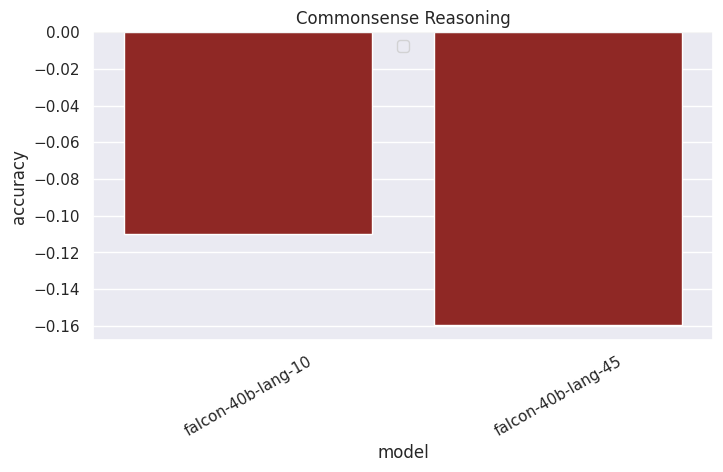

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


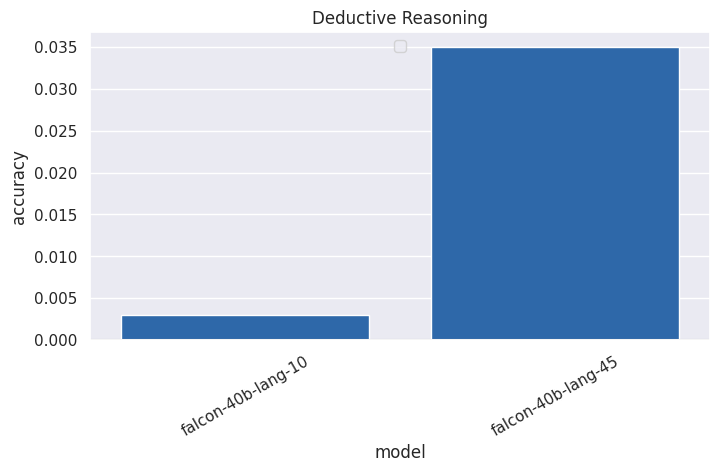

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


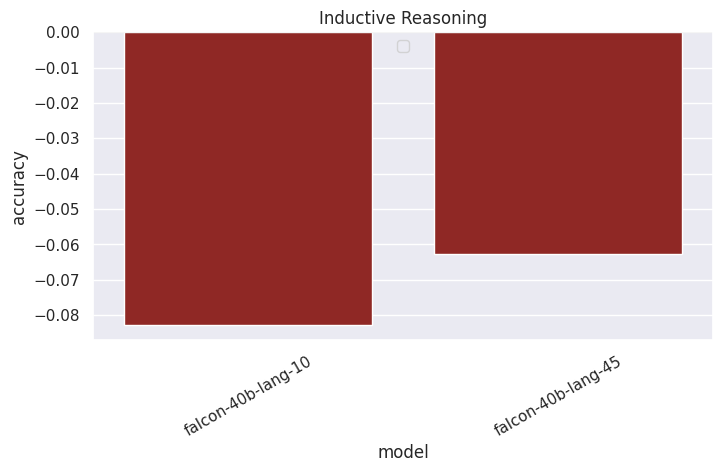

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


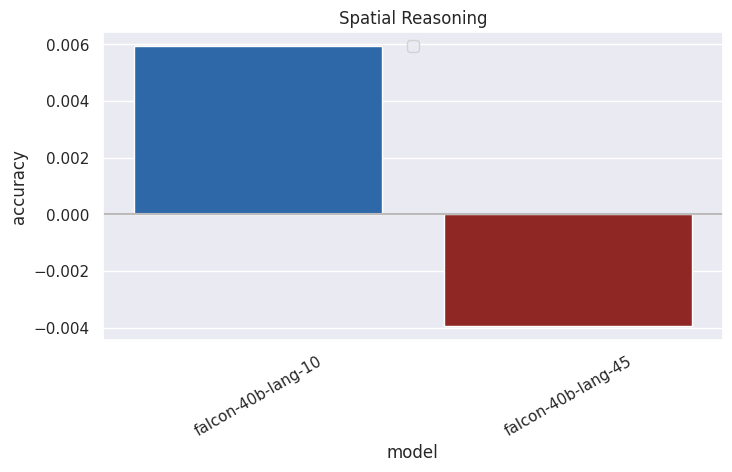

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


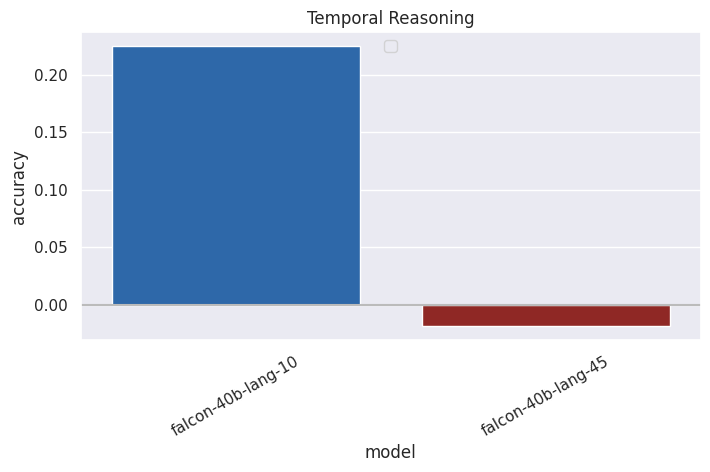

In [512]:
sns.set(rc={'figure.figsize':(8,4)})
for reasoning in multi_falcon_40b_diff_df['reasoning'].unique():
    pdf = multi_falcon_40b_diff_df.loc[
        multi_falcon_40b_diff_df['reasoning'] == reasoning
    ].sort_values('model_index').groupby(['model_index','model'])['accuracy'].mean().reset_index()
    
    pdf['score_type'] = pdf['accuracy'].apply(lambda x: 0 if x < 0 else 1)
    score_types = list(pdf['score_type'].unique())
    colors = (['#a11713'] if 0 in score_types else []) + (['#1a67bd'] if 1 in score_types else [])

    ax = sns.barplot(data=pdf, x='model', y='accuracy', hue='score_type', legend=None, palette=colors)
    ax.axhline(0, ls='-', c='#BBBBBB')
    plt.legend(ncols=4, loc='upper center')
    plt.xticks(rotation=30)
    plt.title(f'{reasoning} Reasoning')
    plt.show()

## New Visualization ChatGPT

### 7B

In [513]:
sig_df = pd.read_csv('significance/chatgpt.csv')
sig_df = sig_df.loc[sig_df['model'].str.contains('7b'),:]

In [514]:
pdf = multi_falcon_7b_diff_df.sort_values('model_index').groupby(['model_index','model','reasoning'])['accuracy'].mean().reset_index()

In [515]:
sigbin_df = sig_df.pivot(index='model', columns='reasoning_type', values='probability').applymap(lambda x: 1 if x <= 0.05 else 0)
sign_df = pdf.pivot(index='model', columns='reasoning', values='accuracy').applymap(lambda x: -1 if x < 0 else 1)

sigbin_df.loc['falcon-7b-lang-1', :] = 1 
sign_df.loc['falcon-7b-lang-1', :] = 2

/tmp/ipykernel_2878755/996152566.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sigbin_df = sig_df.pivot(index='model', columns='reasoning_type', values='probability').applymap(lambda x: 1 if x <= 0.05 else 0)
/tmp/ipykernel_2878755/996152566.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sign_df = pdf.pivot(index='model', columns='reasoning', values='accuracy').applymap(lambda x: -1 if x < 0 else 1)


In [516]:
avg_7b_df = df.loc[df['model'].str.contains('7b')].groupby(['model', 'reasoning'])[['accuracy']].mean().reset_index()
avg_7b_df = avg_7b_df.pivot(index='model', columns='reasoning', values='accuracy') * 100

In [517]:
sigbin_df = sigbin_df.loc[
    ['falcon-7b-lang-1', 'falcon-7b-lang-2', 'falcon-7b-lang-3', 'falcon-7b-lang-5', 'falcon-7b-lang-10', 'falcon-7b-lang-20', 'falcon-7b-lang-45'],
    ['Abductive', 'Causal', 'Inductive', 'Deductive', 'Commonsense', 'Spatial', 'Temporal']
]
sign_df = sign_df.loc[
    ['falcon-7b-lang-1', 'falcon-7b-lang-2', 'falcon-7b-lang-3', 'falcon-7b-lang-5', 'falcon-7b-lang-10', 'falcon-7b-lang-20', 'falcon-7b-lang-45'],
    ['Abductive', 'Causal', 'Inductive', 'Deductive', 'Commonsense', 'Spatial', 'Temporal']
]
avg_7b_df = avg_7b_df.loc[
    ['falcon-7b-lang-1', 'falcon-7b-lang-2', 'falcon-7b-lang-3', 'falcon-7b-lang-5', 'falcon-7b-lang-10', 'falcon-7b-lang-20', 'falcon-7b-lang-45'],
    ['Abductive', 'Causal', 'Inductive', 'Deductive', 'Commonsense', 'Spatial', 'Temporal']
]

In [518]:
cmap = plt.get_cmap('Set3')
rgb_cm = cmap.colors
from matplotlib.colors import ListedColormap

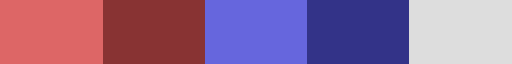

In [519]:
my_cm = ListedColormap(['#DD6666', '#883333', '#6666DD', '#333388', '#DDDDDD'])
my_cm

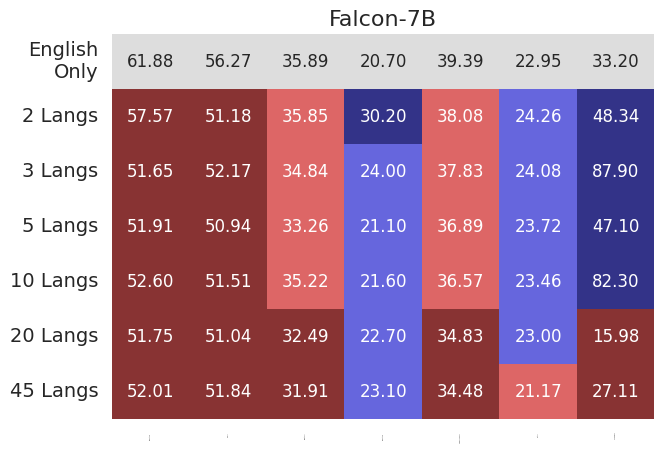

In [520]:
sns.set(rc={'figure.figsize':(7,5)})
ax = sns.heatmap(sigbin_df + sign_df, cmap=my_cm, vmin=-1, vmax=3, annot=avg_7b_df, fmt='.2f', cbar=False)
plt.yticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5], ['English\nOnly','2 Langs','3 Langs','5 Langs','10 Langs','20 Langs','45 Langs'])
plt.ylabel('')
plt.xlabel('')
plt.xticks(fontsize=0)
plt.yticks(fontsize=14)
plt.title('Falcon-7B', fontsize=16)
plt.savefig('chatgpt_significance_7b.pdf', bbox_inches='tight')
plt.show()

### 40B

In [521]:
sig_df = pd.read_csv('significance/chatgpt.csv')
sig_df = sig_df.loc[sig_df['model'].str.contains('40b'),:]

In [522]:
pdf = multi_falcon_40b_diff_df.sort_values('model_index').groupby(['model_index','model','reasoning'])['accuracy'].mean().reset_index()

In [523]:
sigbin_df = sig_df.pivot(index='model', columns='reasoning_type', values='probability').applymap(lambda x: 1 if x <= 0.05 else 0)
sign_df = pdf.pivot(index='model', columns='reasoning', values='accuracy').applymap(lambda x: -1 if x < 0 else 1)

sigbin_df.loc['falcon-40b-lang-1', :] = 1 
sign_df.loc['falcon-40b-lang-1', :] = 2

/tmp/ipykernel_2878755/1198631872.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sigbin_df = sig_df.pivot(index='model', columns='reasoning_type', values='probability').applymap(lambda x: 1 if x <= 0.05 else 0)
/tmp/ipykernel_2878755/1198631872.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sign_df = pdf.pivot(index='model', columns='reasoning', values='accuracy').applymap(lambda x: -1 if x < 0 else 1)


In [524]:
avg_40b_df = df.loc[df['model'].str.contains('40b')].groupby(['model', 'reasoning'])[['accuracy']].mean().reset_index()
avg_40b_df = avg_40b_df.pivot(index='model', columns='reasoning', values='accuracy') * 100

In [525]:
sigbin_df = sigbin_df.loc[
    ['falcon-40b-lang-1', 'falcon-40b-lang-10', 'falcon-40b-lang-45'],
    ['Abductive', 'Causal', 'Inductive', 'Deductive', 'Commonsense', 'Spatial', 'Temporal']
]
sign_df = sign_df.loc[
    ['falcon-40b-lang-1', 'falcon-40b-lang-10', 'falcon-40b-lang-45'],
    ['Abductive', 'Causal', 'Inductive', 'Deductive', 'Commonsense', 'Spatial', 'Temporal']
]
avg_40b_df = avg_40b_df.loc[
    ['falcon-40b-lang-1', 'falcon-40b-lang-10', 'falcon-40b-lang-45'],
    ['Abductive', 'Causal', 'Inductive', 'Deductive', 'Commonsense', 'Spatial', 'Temporal']
]

In [526]:
cmap = plt.get_cmap('Set3')
rgb_cm = cmap.colors
from matplotlib.colors import ListedColormap

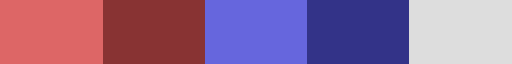

In [527]:
my_cm = ListedColormap(['#DD6666', '#883333', '#6666DD', '#333388', '#DDDDDD'])
my_cm

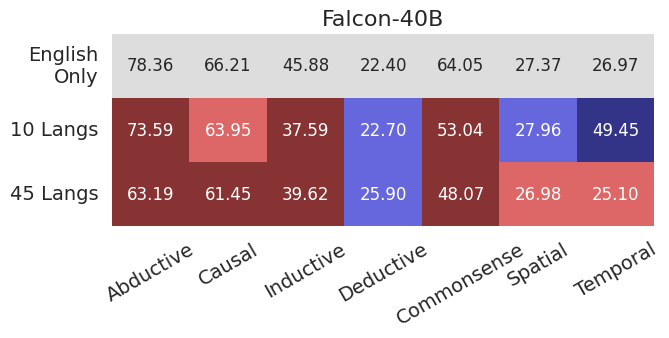

In [528]:
sns.set(rc={'figure.figsize':(7,2.5)})
ax = sns.heatmap(sigbin_df + sign_df, cmap=my_cm, vmin=-1, vmax=3, annot=avg_40b_df, fmt='.2f', cbar=False)
plt.yticks([0.5,1.5,2.5], ['English\nOnly','10 Langs','45 Langs'])
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)
plt.title('Falcon-40B', fontsize=16)
plt.savefig('chatgpt_significance_40b.pdf', bbox_inches='tight')
plt.show()

In [539]:
xdf = pd.concat([
    avg_7b_df,
    avg_40b_df
])
xdf.corr()

reasoning,Abductive,Causal,Inductive,Deductive,Commonsense,Spatial,Temporal
reasoning,,,,,,,
Abductive,1.000000,0.957287,0.874674,-0.025176,0.956192,0.831375,-0.298655
Causal,0.957287,1.000000,0.866668,-0.088697,0.954803,0.861911,-0.308875
Inductive,0.874674,0.866668,1.000000,0.076443,0.940298,0.801120,-0.168227
Deductive,-0.025176,-0.088697,0.076443,1.000000,-0.032988,0.159763,-0.000823
Commonsense,0.956192,0.954803,0.940298,-0.032988,1.000000,0.873741,-0.235665
Spatial,0.831375,0.861911,0.801120,0.159763,0.873741,1.000000,-0.049193
Temporal,-0.298655,-0.308875,-0.168227,-0.000823,-0.235665,-0.049193,1.000000


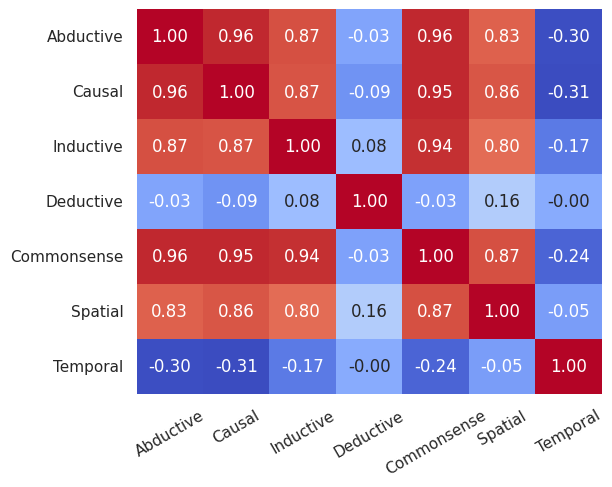

In [550]:
sns.set(rc={'figure.figsize':(6,5)})
sns.heatmap(xdf.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=False)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=30)
plt.savefig('reasoning_corr.pdf', bbox_inches='tight')
plt.show()

### Check MMLU

In [606]:
mmlu_cat_df = pd.read_csv('mmlu_category.csv')
mmlu_cat_df = mmlu_cat_df.set_index('subject')

In [607]:
data = []
for path in glob.glob('results/results_falcon-*/*.csv'):
    if 'baseline' in path:
        continue
    model = path.split('results_')[1].split('/')[0]
    subject = path.split('/')[-1][:-4]
    category = mmlu_cat_df.loc[subject, 'category']
    model_index = model_to_index[model]
    
    # Get Level
    if 'high_school' in path:
        level = 'high_school'
    elif 'college' in path:
        level = 'college'
    elif 'professional' in path:
        level = 'professional'
    elif 'elementary' in path:
        level = 'elementary'
    else:
        level = 'other'
        
    # Compute Correctnesss & Accuracy
    df = pd.read_csv(path)
    num_correct = df.iloc[:,6].sum() 
    num_data = df.shape[0]
    accuracy = num_correct / num_data
    
    data.append({
        'model': model, 'model_index': model_index, 'level': level, 'subject': subject, 'category': category, 
        'num_correct': num_correct, 'num_data': num_data, 'accuracy': accuracy * 100
    })
df = pd.DataFrame(data)

In [553]:
mono_falcon_7b_df = df.loc[df['model'] == 'falcon-7b-lang-1', :]
mono_falcon_40b_df = df.loc[df['model'] == 'falcon-40b-lang-1', :]
multi_falcon_7b_df = df.loc[(df['model'] != 'falcon-7b-lang-1') & (df['model'].str.contains('7b')), :]
multi_falcon_40b_df = df.loc[(df['model'] != 'falcon-40b-lang-1') & (df['model'].str.contains('40b')), :]

In [554]:
mono_7b_avg_df = mono_falcon_7b_df.groupby(['category','subject','level'])[['accuracy']].mean()
mono_40b_avg_df = mono_falcon_40b_df.groupby(['category','subject','level'])[['accuracy']].mean()

In [555]:
multi_falcon_7b_avg_df = multi_falcon_7b_df.groupby(['model','category','subject','level'])[['accuracy']].mean().reset_index()
multi_falcon_40b_avg_df = multi_falcon_40b_df.groupby(['model','category','subject','level'])[['accuracy']].mean().reset_index()

In [556]:
dfs = []
for idx, tdf in multi_falcon_7b_avg_df.groupby('model'):
    tdf = (tdf.set_index(['category','subject','level']) - mono_7b_avg_df).reset_index()
    tdf['model'] = idx
    dfs.append(tdf)
multi_falcon_7b_diff_df = pd.concat(dfs)[['model','category','subject','level','accuracy']]
multi_falcon_7b_diff_df['model_index'] = multi_falcon_7b_diff_df['model'].apply(lambda x: model_to_index[x])

In [557]:
dfs = []
for idx, tdf in multi_falcon_40b_avg_df.groupby('model'):
    tdf = (tdf.set_index(['category','subject','level']) - mono_40b_avg_df).reset_index()
    tdf['model'] = idx
    dfs.append(tdf)
multi_falcon_40b_diff_df = pd.concat(dfs)[['model','category','subject','level','accuracy']]
multi_falcon_40b_diff_df['model_index'] = multi_falcon_40b_diff_df['model'].apply(lambda x: model_to_index[x])

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_dat

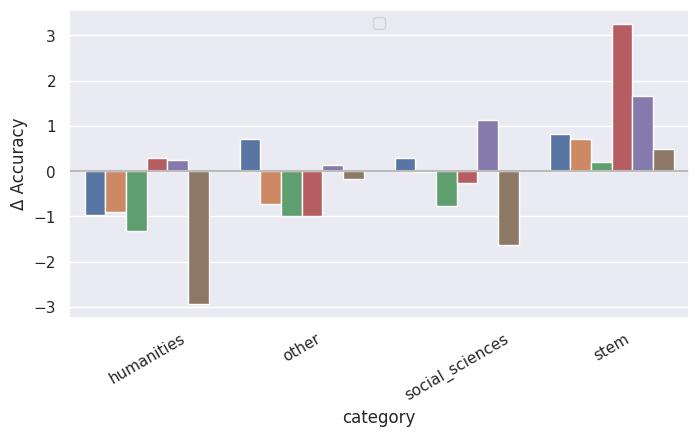

In [558]:
sns.set(rc={'figure.figsize':(8,4)})
pdf = multi_falcon_7b_diff_df.sort_values('model_index').groupby(['model_index','category','model'])['accuracy'].mean().reset_index()

pdf['score_type'] = pdf['accuracy'].apply(lambda x: 0 if x < 0 else 1)
score_types = list(pdf['score_type'].unique())
colors = (['#a11713'] if 0 in score_types else []) + (['#1a67bd'] if 1 in score_types else [])

ax = sns.barplot(data=pdf, x='category', y='accuracy', hue='model', legend=None)
ax.axhline(0, ls='-', c='#BBBBBB')
plt.legend(ncols=2, loc='upper center')
plt.ylabel('Δ Accuracy')
plt.xticks(rotation=30)
plt.savefig('mmlu_category.png', bbox_inches='tight')
plt.show()

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


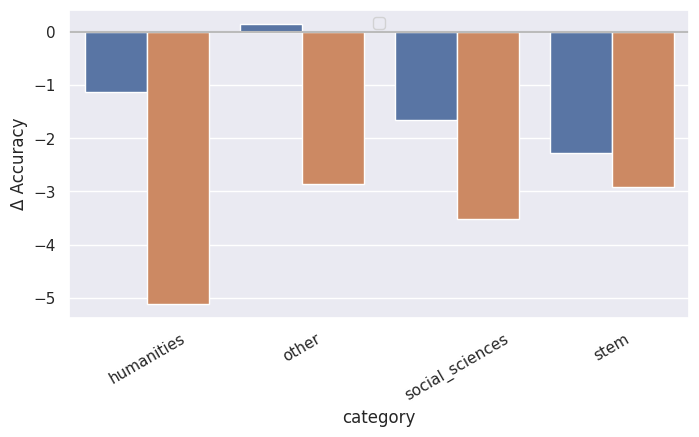

In [559]:
sns.set(rc={'figure.figsize':(8,4)})
pdf = multi_falcon_40b_diff_df.sort_values('model_index').groupby(['model_index','category','model'])['accuracy'].mean().reset_index()

pdf['score_type'] = pdf['accuracy'].apply(lambda x: 0 if x < 0 else 1)
score_types = list(pdf['score_type'].unique())
colors = (['#a11713'] if 0 in score_types else []) + (['#1a67bd'] if 1 in score_types else [])

ax = sns.barplot(data=pdf, x='category', y='accuracy', hue='model', legend=None)
ax.axhline(0, ls='-', c='#BBBBBB')
plt.legend(ncols=2, loc='upper center')
plt.ylabel('Δ Accuracy')
plt.xticks(rotation=30)
plt.savefig('mmlu_category_40b.png', bbox_inches='tight')
plt.show()

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_dat

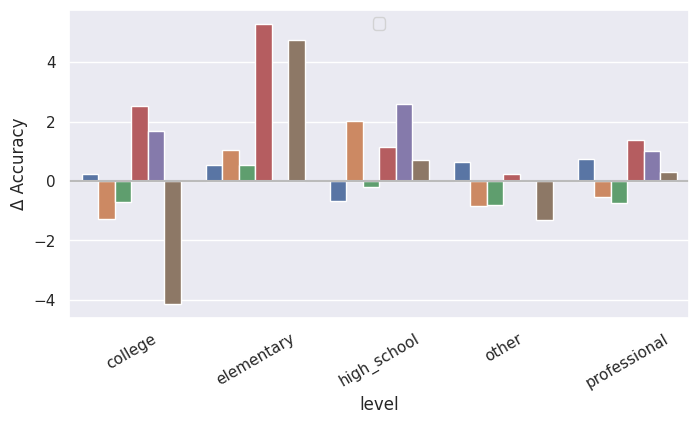

In [560]:
sns.set(rc={'figure.figsize':(8,4)})
pdf = multi_falcon_7b_diff_df.sort_values('model_index').groupby(['model_index','level','model'])['accuracy'].mean().reset_index()

pdf['score_type'] = pdf['accuracy'].apply(lambda x: 0 if x < 0 else 1)
score_types = list(pdf['score_type'].unique())
colors = (['#a11713'] if 0 in score_types else []) + (['#1a67bd'] if 1 in score_types else [])

ax = sns.barplot(data=pdf, x='level', y='accuracy', hue='model', legend=None)
ax.axhline(0, ls='-', c='#BBBBBB')
plt.legend(ncols=2, loc='upper center')
plt.ylabel('Δ Accuracy')
plt.xticks(rotation=30)
plt.savefig('mmlu_level.png', bbox_inches='tight')
plt.show()

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


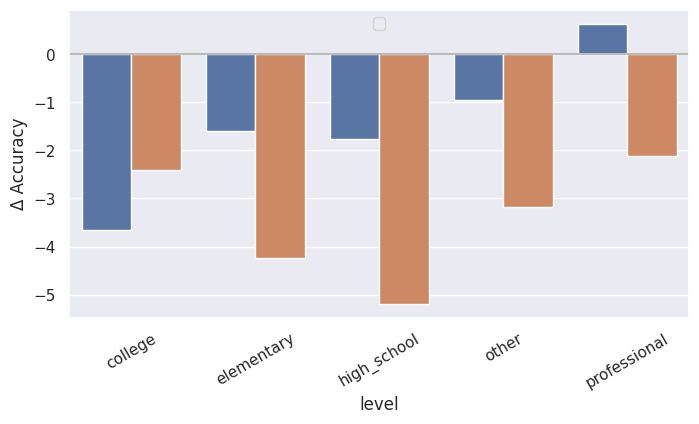

In [561]:
sns.set(rc={'figure.figsize':(8,4)})
pdf = multi_falcon_40b_diff_df.sort_values('model_index').groupby(['model_index','level','model'])['accuracy'].mean().reset_index()

pdf['score_type'] = pdf['accuracy'].apply(lambda x: 0 if x < 0 else 1)
score_types = list(pdf['score_type'].unique())
colors = (['#a11713'] if 0 in score_types else []) + (['#1a67bd'] if 1 in score_types else [])

ax = sns.barplot(data=pdf, x='level', y='accuracy', hue='model', legend=None)
ax.axhline(0, ls='-', c='#BBBBBB')
plt.legend(ncols=2, loc='upper center')
plt.ylabel('Δ Accuracy')
plt.xticks(rotation=30)
plt.savefig('mmlu_level_40b.png', bbox_inches='tight')
plt.show()

## Per Category

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


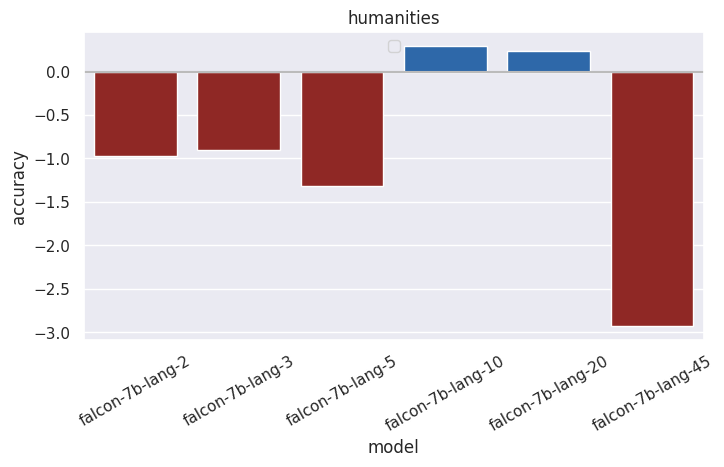

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


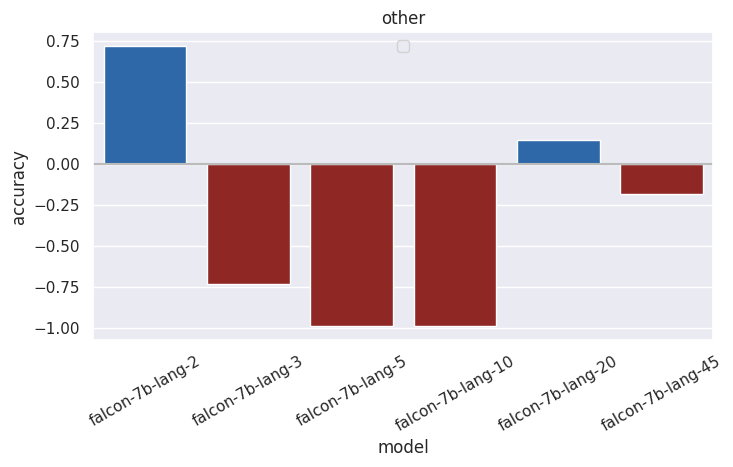

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


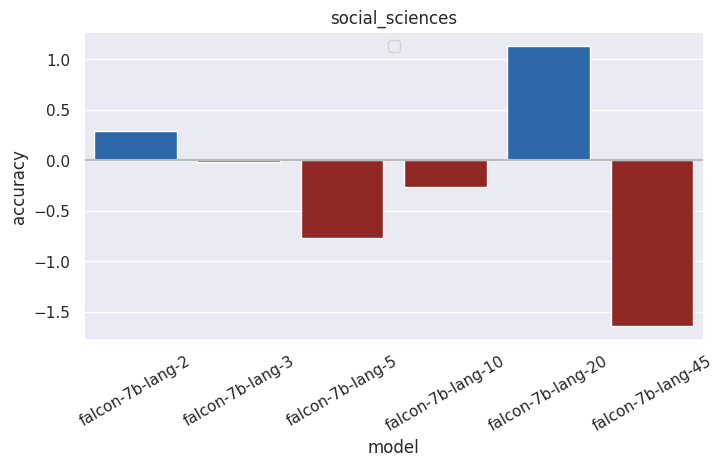

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


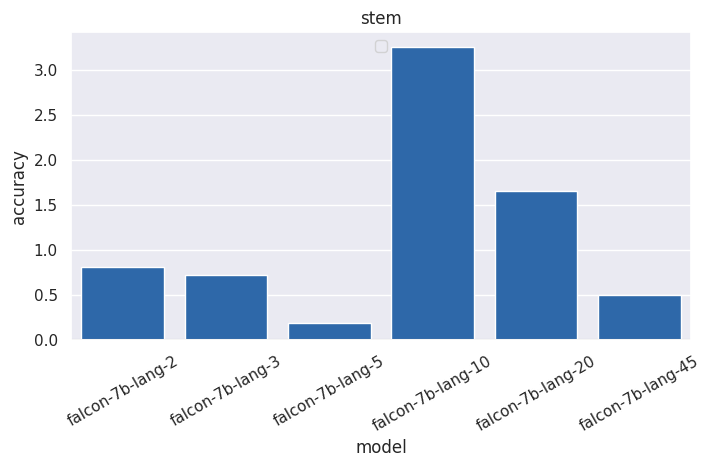

In [562]:
sns.set(rc={'figure.figsize':(8,4)})
for category in multi_falcon_7b_diff_df['category'].unique():
    pdf = multi_falcon_7b_diff_df.loc[
        multi_falcon_7b_diff_df['category'] == category
    ].sort_values('model_index').groupby(['model_index','model'])['accuracy'].mean().reset_index()
    
    pdf['score_type'] = pdf['accuracy'].apply(lambda x: 0 if x < 0 else 1)
    score_types = list(pdf['score_type'].unique())
    colors = (['#a11713'] if 0 in score_types else []) + (['#1a67bd'] if 1 in score_types else [])

    ax = sns.barplot(data=pdf, x='model', y='accuracy', hue='score_type', legend=None, palette=colors)
    ax.axhline(0, ls='-', c='#BBBBBB')
    plt.legend(ncols=2, loc='upper center')
    plt.xticks(rotation=30)
    plt.title(category)
    plt.show()

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


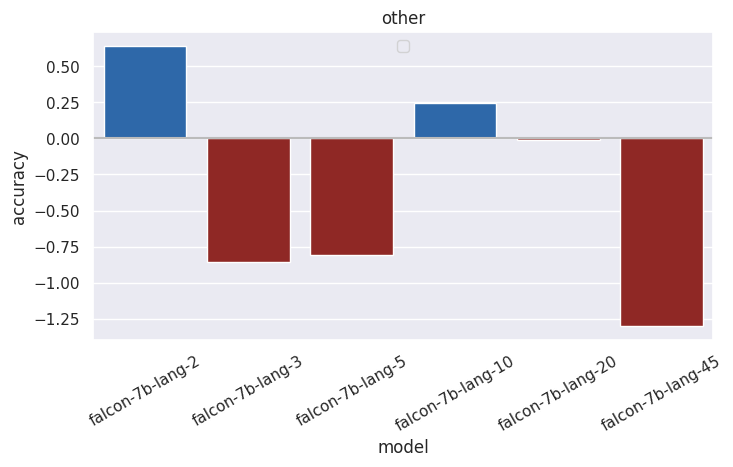

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


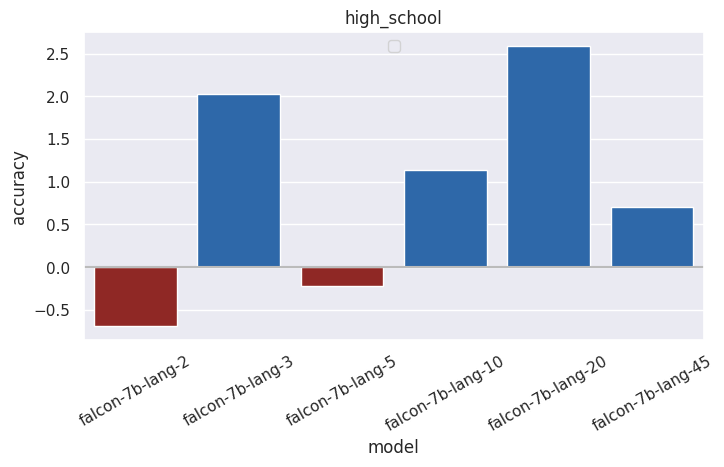

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


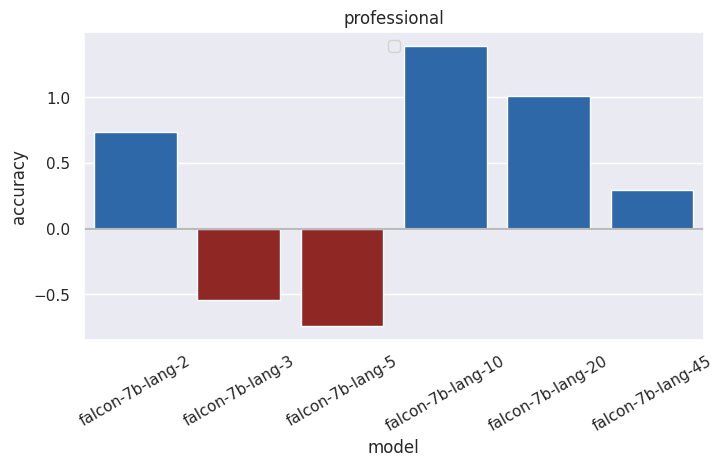

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


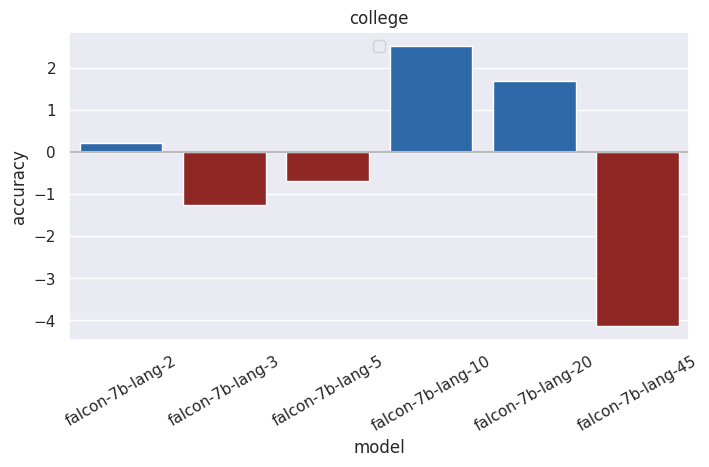

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


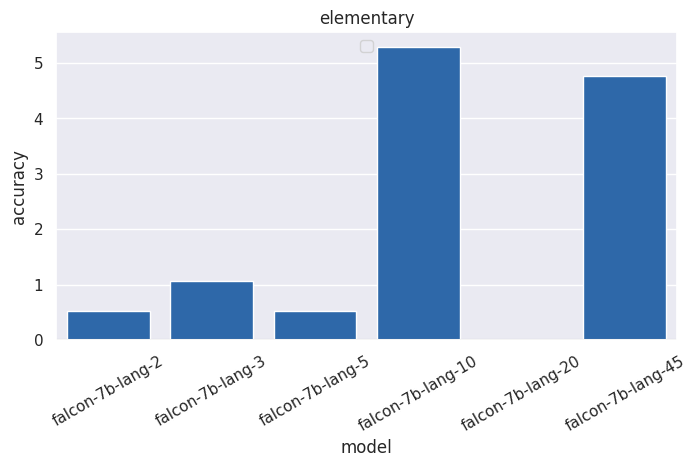

In [563]:
sns.set(rc={'figure.figsize':(8,4)})
for level in multi_falcon_7b_diff_df['level'].unique():
    pdf = multi_falcon_7b_diff_df.loc[
        multi_falcon_7b_diff_df['level'] == level
    ].sort_values('model_index').groupby(['model_index','model'])['accuracy'].mean().reset_index()

    pdf['score_type'] = pdf['accuracy'].apply(lambda x: 0 if x < 0 else 1)
    score_types = list(pdf['score_type'].unique())
    colors = (['#a11713'] if 0 in score_types else []) + (['#1a67bd'] if 1 in score_types else [])

    ax = sns.barplot(data=pdf, x='model', y='accuracy', hue='score_type', legend=None, palette=colors)
    ax.axhline(0, ls='-', c='#BBBBBB')
    plt.legend(ncols=2, loc='upper center')
    plt.xticks(rotation=30)
    plt.title(level)
    plt.show()

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


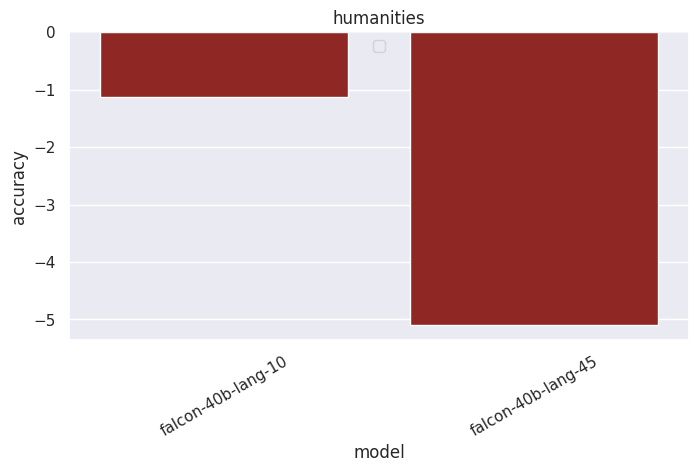

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


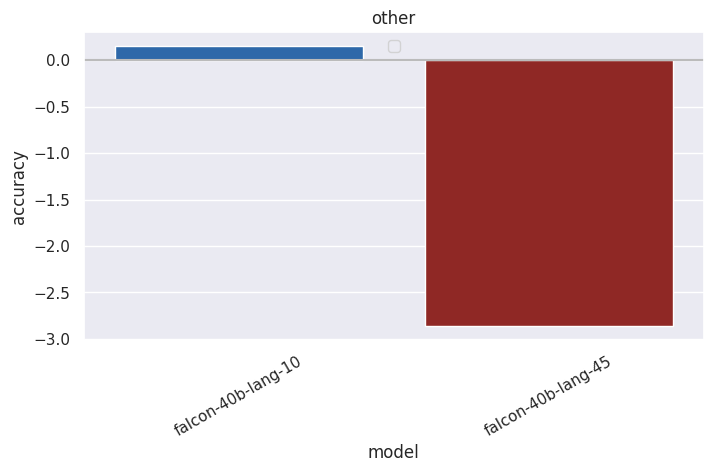

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


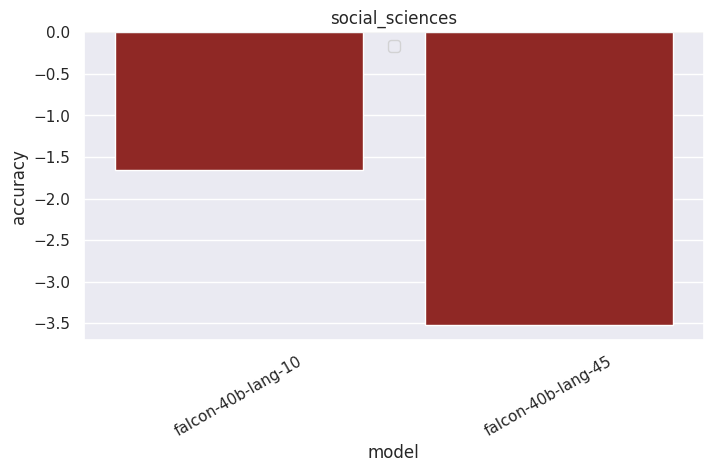

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


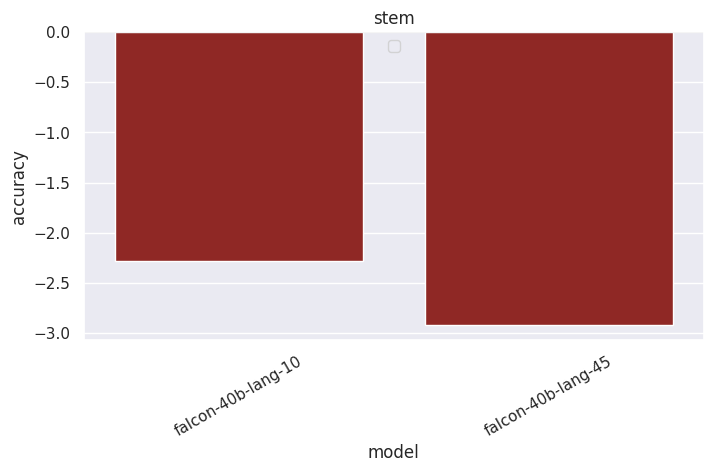

In [564]:
sns.set(rc={'figure.figsize':(8,4)})
for category in multi_falcon_40b_diff_df['category'].unique():
    pdf = multi_falcon_40b_diff_df.loc[
        multi_falcon_40b_diff_df['category'] == category
    ].sort_values('model_index').groupby(['model_index','model'])['accuracy'].mean().reset_index()
    
    pdf['score_type'] = pdf['accuracy'].apply(lambda x: 0 if x < 0 else 1)
    score_types = list(pdf['score_type'].unique())
    colors = (['#a11713'] if 0 in score_types else []) + (['#1a67bd'] if 1 in score_types else [])

    ax = sns.barplot(data=pdf, x='model', y='accuracy', hue='score_type', legend=None, palette=colors)
    ax.axhline(0, ls='-', c='#BBBBBB')
    plt.legend(ncols=2, loc='upper center')
    plt.xticks(rotation=30)
    plt.title(category)
    plt.show()

## Per Level

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


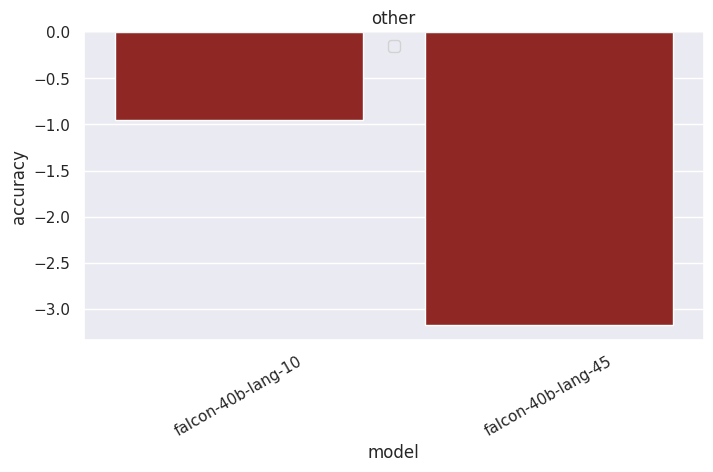

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


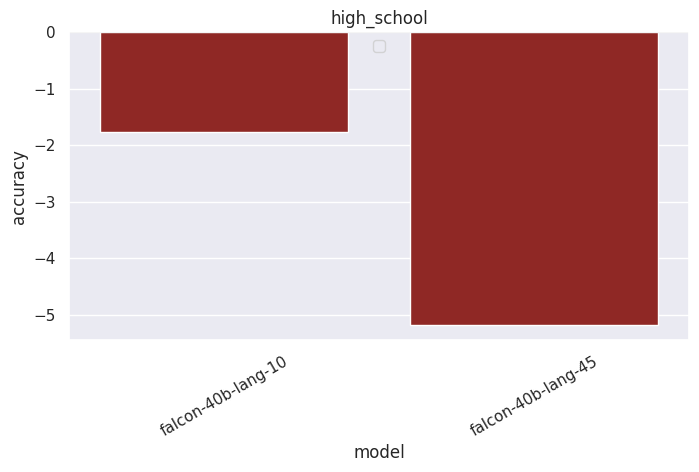

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


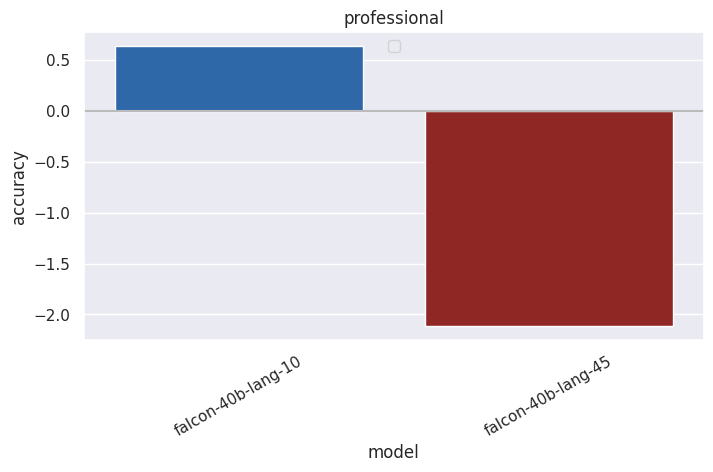

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


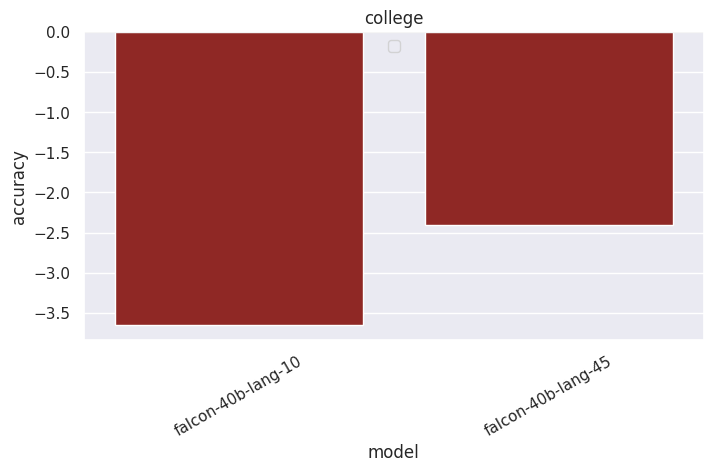

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


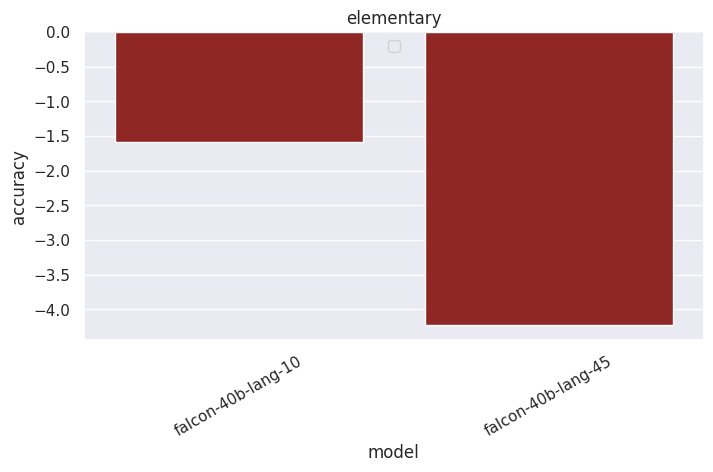

In [565]:
sns.set(rc={'figure.figsize':(8,4)})
for level in multi_falcon_40b_diff_df['level'].unique():
    pdf = multi_falcon_40b_diff_df.loc[
        multi_falcon_40b_diff_df['level'] == level
    ].sort_values('model_index').groupby(['model_index','model'])['accuracy'].mean().reset_index()

    pdf['score_type'] = pdf['accuracy'].apply(lambda x: 0 if x < 0 else 1)
    score_types = list(pdf['score_type'].unique())
    colors = (['#a11713'] if 0 in score_types else []) + (['#1a67bd'] if 1 in score_types else [])

    ax = sns.barplot(data=pdf, x='model', y='accuracy', hue='score_type', legend=None, palette=colors)
    ax.axhline(0, ls='-', c='#BBBBBB')
    plt.legend(ncols=2, loc='upper center')
    plt.xticks(rotation=30)
    plt.title(level)
    plt.show()

## New Visualization MMLU

### Category 7B

In [566]:
sig_df = pd.read_csv('significance/category_mmlu.csv')
sig_df = sig_df.loc[sig_df['model'].str.contains('7b'),:]

In [567]:
pdf = multi_falcon_7b_diff_df.sort_values('model_index').groupby(['model_index','model','category'])['accuracy'].mean().reset_index()

In [568]:
sigbin_df = sig_df.pivot(index='model', columns='category', values='probability').applymap(lambda x: 1 if x <= 0.05 else 0)
sign_df = pdf.pivot(index='model', columns='category', values='accuracy').applymap(lambda x: -1 if x < 0 else 1)

sigbin_df.loc['falcon-7b-lang-1', :] = 1 
sign_df.loc['falcon-7b-lang-1', :] = 2

/tmp/ipykernel_2878755/2349813960.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sigbin_df = sig_df.pivot(index='model', columns='category', values='probability').applymap(lambda x: 1 if x <= 0.05 else 0)
/tmp/ipykernel_2878755/2349813960.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sign_df = pdf.pivot(index='model', columns='category', values='accuracy').applymap(lambda x: -1 if x < 0 else 1)


In [569]:
avg_7b_df

reasoning,Abductive,Causal,Inductive,Deductive,Commonsense,Spatial,Temporal
model,,,,,,,
falcon-7b-lang-1,61.882968,56.267672,35.891274,20.7,39.385749,22.951901,33.195021
falcon-7b-lang-2,57.567833,51.178134,35.847644,30.2,38.076811,24.262280,48.340249
falcon-7b-lang-3,51.650866,52.167766,34.843194,24.0,37.830818,24.077689,87.897649
falcon-7b-lang-5,51.912390,50.942507,33.264223,21.1,36.894086,23.723886,47.095436
falcon-7b-lang-10,52.598889,51.508011,35.216754,21.6,36.570873,23.457191,82.295989
falcon-7b-lang-20,51.748938,51.036758,32.490663,22.7,34.832105,23.003225,15.975104
falcon-7b-lang-45,52.010461,51.837889,31.914572,23.1,34.477156,21.167846,27.109267


In [570]:
avg_7b_df = df.loc[df['model'].str.contains('7b')].groupby(['model', 'category'])[['accuracy']].mean().reset_index()
avg_7b_df = avg_7b_df.pivot(index='model', columns='category', values='accuracy')

In [571]:
sigbin_df = sigbin_df.loc[
    ['falcon-7b-lang-1', 'falcon-7b-lang-2', 'falcon-7b-lang-3', 'falcon-7b-lang-5', 'falcon-7b-lang-10', 'falcon-7b-lang-20', 'falcon-7b-lang-45'],
    ['humanities', 'other', 'social_sciences', 'stem']
]
sign_df = sign_df.loc[
    ['falcon-7b-lang-1', 'falcon-7b-lang-2', 'falcon-7b-lang-3', 'falcon-7b-lang-5', 'falcon-7b-lang-10', 'falcon-7b-lang-20', 'falcon-7b-lang-45'],
    ['humanities', 'other', 'social_sciences', 'stem']
]
avg_7b_df = avg_7b_df.loc[
    ['falcon-7b-lang-1', 'falcon-7b-lang-2', 'falcon-7b-lang-3', 'falcon-7b-lang-5', 'falcon-7b-lang-10', 'falcon-7b-lang-20', 'falcon-7b-lang-45'],
    ['humanities', 'other', 'social_sciences', 'stem']
]

In [572]:
cmap = plt.get_cmap('Set3')
rgb_cm = cmap.colors
from matplotlib.colors import ListedColormap

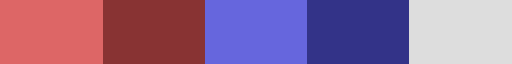

In [573]:
my_cm = ListedColormap(['#DD6666', '#883333', '#6666DD', '#333388', '#DDDDDD'])
my_cm

In [574]:
sigbin_df + sign_df

category,humanities,other,social_sciences,stem
model,,,,
falcon-7b-lang-1,3.0,3.0,3.0,3.0
falcon-7b-lang-2,-1.0,1.0,1.0,1.0
falcon-7b-lang-3,-1.0,-1.0,-1.0,1.0
falcon-7b-lang-5,-1.0,-1.0,-1.0,1.0
falcon-7b-lang-10,1.0,-1.0,-1.0,2.0
falcon-7b-lang-20,1.0,1.0,1.0,1.0
falcon-7b-lang-45,-1.0,-1.0,-1.0,1.0


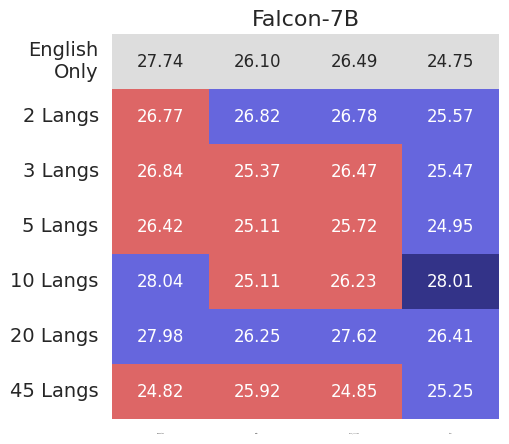

In [575]:
def format_subject(subject):
    if subject == 'stem':
        return 'STEM'
    else:
        return subject.replace('_', ' ').title()

sns.set(rc={'figure.figsize':(5,5)})
ax = sns.heatmap(sigbin_df + sign_df, cmap=my_cm, vmin=-1, vmax=3, annot=avg_7b_df, fmt='.2f', cbar=False)
plt.yticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5], ['English\nOnly','2 Langs','3 Langs','5 Langs','10 Langs','20 Langs','45 Langs'])
plt.ylabel('')
plt.xlabel('')
plt.xticks(fontsize=0)
plt.yticks(fontsize=14)
plt.title('Falcon-7B', fontsize=16)
plt.savefig('mmlu_category_significance_7b.pdf', bbox_inches='tight')
plt.show()

### Category 40B

In [576]:
sig_df = pd.read_csv('significance/category_mmlu.csv')
sig_df = sig_df.loc[sig_df['model'].str.contains('40b'),:]

In [577]:
pdf = multi_falcon_40b_diff_df.sort_values('model_index').groupby(['model_index','model','category'])['accuracy'].mean().reset_index()

In [578]:
sigbin_df = sig_df.pivot(index='model', columns='category', values='probability').applymap(lambda x: 1 if x <= 0.05 else 0)
sign_df = pdf.pivot(index='model', columns='category', values='accuracy').applymap(lambda x: -1 if x < 0 else 1)

sigbin_df.loc['falcon-40b-lang-1', :] = 1 
sign_df.loc['falcon-40b-lang-1', :] = 2

/tmp/ipykernel_2878755/2004400667.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sigbin_df = sig_df.pivot(index='model', columns='category', values='probability').applymap(lambda x: 1 if x <= 0.05 else 0)
/tmp/ipykernel_2878755/2004400667.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sign_df = pdf.pivot(index='model', columns='category', values='accuracy').applymap(lambda x: -1 if x < 0 else 1)


In [579]:
avg_40b_df = df.loc[df['model'].str.contains('40b')].groupby(['model', 'category'])[['accuracy']].mean().reset_index()
avg_40b_df = avg_40b_df.pivot(index='model', columns='category', values='accuracy')

In [580]:
sigbin_df

category,humanities,other,social_sciences,stem
model,,,,
falcon-40b-lang-1,1,1,1,1
falcon-40b-lang-10,0,0,0,0
falcon-40b-lang-45,1,0,1,1


In [581]:
sigbin_df = sigbin_df.loc[
    ['falcon-40b-lang-1', 'falcon-40b-lang-10', 'falcon-40b-lang-45'],
    ['humanities', 'other', 'social_sciences', 'stem']
]
sign_df = sign_df.loc[
    ['falcon-40b-lang-1', 'falcon-40b-lang-10', 'falcon-40b-lang-45'],
    ['humanities', 'other', 'social_sciences', 'stem']
]
avg_40b_df = avg_40b_df.loc[
    ['falcon-40b-lang-1', 'falcon-40b-lang-10', 'falcon-40b-lang-45'],
    ['humanities', 'other', 'social_sciences', 'stem']
]

In [582]:
cmap = plt.get_cmap('Set3')
rgb_cm = cmap.colors
from matplotlib.colors import ListedColormap

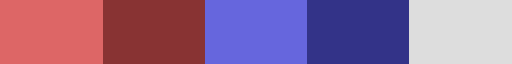

In [583]:
my_cm = ListedColormap(['#DD6666', '#883333', '#6666DD', '#333388', '#DDDDDD'])
my_cm

In [584]:
sigbin_df + sign_df

category,humanities,other,social_sciences,stem
model,,,,
falcon-40b-lang-1,3.0,3.0,3.0,3.0
falcon-40b-lang-10,-1.0,1.0,-1.0,-1.0
falcon-40b-lang-45,0.0,-1.0,0.0,0.0


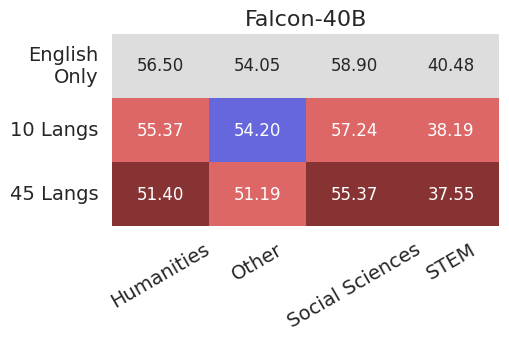

In [585]:
def format_subject(subject):
    if subject == 'stem':
        return 'STEM'
    else:
        return subject.replace('_', ' ').title()

sns.set(rc={'figure.figsize':(5,2.5)})
ax = sns.heatmap(sigbin_df + sign_df, cmap=my_cm, vmin=-1, vmax=3, annot=avg_40b_df, fmt='.2f', cbar=False)
plt.yticks([0.5,1.5,2.5], ['English\nOnly','10 Langs','45 Langs'])
plt.ylabel('')
plt.xlabel('')
plt.xticks([0.5,1.5,2.5,3.5], map(format_subject, sigbin_df.columns.tolist()), rotation=30, fontsize=14)
plt.yticks(fontsize=14)
plt.title('Falcon-40B', fontsize=16)
plt.savefig('mmlu_category_significance_40b.pdf', bbox_inches='tight')
plt.show()

### Level 7B

In [586]:
sig_df = pd.read_csv('significance/level_mmlu.csv')
sig_df = sig_df.loc[sig_df['model'].str.contains('7b'),:]

In [587]:
pdf = multi_falcon_7b_diff_df.sort_values('model_index').groupby(['model_index','model','level'])['accuracy'].mean().reset_index()

In [588]:
sigbin_df = sig_df.pivot(index='model', columns='level', values='probability').applymap(lambda x: 1 if x <= 0.05 else 0)
sign_df = pdf.pivot(index='model', columns='level', values='accuracy').applymap(lambda x: -1 if x < 0 else 1)

sigbin_df.loc['falcon-7b-lang-1', :] = 1 
sign_df.loc['falcon-7b-lang-1', :] = 2

/tmp/ipykernel_2878755/2528557138.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sigbin_df = sig_df.pivot(index='model', columns='level', values='probability').applymap(lambda x: 1 if x <= 0.05 else 0)
/tmp/ipykernel_2878755/2528557138.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sign_df = pdf.pivot(index='model', columns='level', values='accuracy').applymap(lambda x: -1 if x < 0 else 1)


In [589]:
avg_7b_df = df.loc[df['model'].str.contains('7b')].groupby(['model', 'level'])[['accuracy']].mean().reset_index()
avg_7b_df = avg_7b_df.pivot(index='model', columns='level', values='accuracy')

In [590]:
sigbin_df

level,college,elementary,high_school,other,professional
model,,,,,
falcon-7b-lang-1,1,1,1,1,1
falcon-7b-lang-10,0,0,0,0,0
falcon-7b-lang-2,0,0,0,0,0
falcon-7b-lang-20,0,0,1,0,0
falcon-7b-lang-3,0,0,0,0,0
falcon-7b-lang-45,0,0,0,0,0
falcon-7b-lang-5,0,0,0,0,0


In [591]:
sigbin_df = sigbin_df.loc[
    ['falcon-7b-lang-1', 'falcon-7b-lang-2', 'falcon-7b-lang-3', 'falcon-7b-lang-5', 'falcon-7b-lang-10', 'falcon-7b-lang-20', 'falcon-7b-lang-45'],
    ['elementary',  'high_school', 'college', 'professional', 'other']
]
sign_df = sign_df.loc[
    ['falcon-7b-lang-1', 'falcon-7b-lang-2', 'falcon-7b-lang-3', 'falcon-7b-lang-5', 'falcon-7b-lang-10', 'falcon-7b-lang-20', 'falcon-7b-lang-45'],
    ['elementary',  'high_school', 'college', 'professional', 'other']
]
avg_7b_df = avg_7b_df.loc[
    ['falcon-7b-lang-1', 'falcon-7b-lang-2', 'falcon-7b-lang-3', 'falcon-7b-lang-5', 'falcon-7b-lang-10', 'falcon-7b-lang-20', 'falcon-7b-lang-45'],
    ['elementary',  'high_school', 'college', 'professional', 'other']
]

In [592]:
cmap = plt.get_cmap('Set3')
rgb_cm = cmap.colors
from matplotlib.colors import ListedColormap

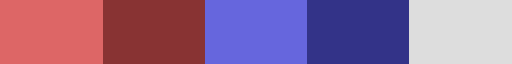

In [593]:
my_cm = ListedColormap(['#DD6666', '#883333', '#6666DD', '#333388', '#DDDDDD'])
my_cm

In [594]:
sigbin_df + sign_df

level,elementary,high_school,college,professional,other
model,,,,,
falcon-7b-lang-1,3.0,3.0,3.0,3.0,3.0
falcon-7b-lang-2,1.0,-1.0,1.0,1.0,1.0
falcon-7b-lang-3,1.0,1.0,-1.0,-1.0,-1.0
falcon-7b-lang-5,1.0,-1.0,-1.0,-1.0,-1.0
falcon-7b-lang-10,1.0,1.0,1.0,1.0,1.0
falcon-7b-lang-20,1.0,2.0,1.0,1.0,-1.0
falcon-7b-lang-45,1.0,1.0,-1.0,1.0,-1.0


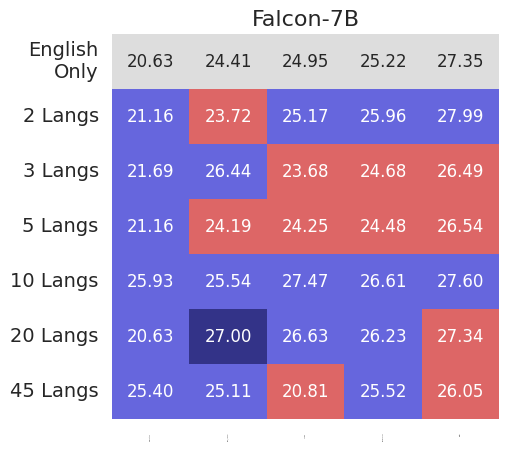

In [595]:
def format_level(subject):
    return subject.replace('_', ' ').title()

sns.set(rc={'figure.figsize':(5,5)})
ax = sns.heatmap(sigbin_df + sign_df, cmap=my_cm, vmin=-1, vmax=3, annot=avg_7b_df, fmt='.2f', cbar=False)
plt.yticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5], ['English\nOnly','2 Langs','3 Langs','5 Langs','10 Langs','20 Langs','45 Langs'])
plt.ylabel('')
plt.xlabel('')
plt.xticks(fontsize=0)
plt.yticks(fontsize=14)
plt.title('Falcon-7B', fontsize=16)
plt.savefig('mmlu_level_significance_7b.pdf', bbox_inches='tight')
plt.show()

### Level 40B

In [596]:
sig_df = pd.read_csv('significance/level_mmlu.csv')
sig_df = sig_df.loc[sig_df['model'].str.contains('40b'),:]

In [597]:
pdf = multi_falcon_40b_diff_df.sort_values('model_index').groupby(['model_index','model','level'])['accuracy'].mean().reset_index()

In [598]:
sigbin_df = sig_df.pivot(index='model', columns='level', values='probability').applymap(lambda x: 1 if x <= 0.05 else 0)
sign_df = pdf.pivot(index='model', columns='level', values='accuracy').applymap(lambda x: -1 if x < 0 else 1)

sigbin_df.loc['falcon-40b-lang-1', :] = 1 
sign_df.loc['falcon-40b-lang-1', :] = 2

/tmp/ipykernel_2878755/1298710686.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sigbin_df = sig_df.pivot(index='model', columns='level', values='probability').applymap(lambda x: 1 if x <= 0.05 else 0)
/tmp/ipykernel_2878755/1298710686.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sign_df = pdf.pivot(index='model', columns='level', values='accuracy').applymap(lambda x: -1 if x < 0 else 1)


In [599]:
avg_40b_df = df.loc[df['model'].str.contains('40b')].groupby(['model', 'level'])[['accuracy']].mean().reset_index()
avg_40b_df = avg_40b_df.pivot(index='model', columns='level', values='accuracy')

In [600]:
sigbin_df

level,college,elementary,high_school,other,professional
model,,,,,
falcon-40b-lang-1,1,1,1,1,1
falcon-40b-lang-10,0,0,0,0,0
falcon-40b-lang-45,0,0,1,1,0


In [601]:
sigbin_df = sigbin_df.loc[
    ['falcon-40b-lang-1', 'falcon-40b-lang-10', 'falcon-40b-lang-45'],
    ['elementary',  'high_school', 'college', 'professional', 'other']
]
sign_df = sign_df.loc[
    ['falcon-40b-lang-1', 'falcon-40b-lang-10', 'falcon-40b-lang-45'],
    ['elementary',  'high_school', 'college', 'professional', 'other']
]
avg_40b_df = avg_40b_df.loc[
    ['falcon-40b-lang-1', 'falcon-40b-lang-10', 'falcon-40b-lang-45'],
    ['elementary',  'high_school', 'college', 'professional', 'other']
]

In [602]:
cmap = plt.get_cmap('Set3')
rgb_cm = cmap.colors
from matplotlib.colors import ListedColormap

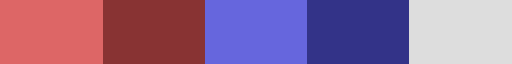

In [603]:
my_cm = ListedColormap(['#DD6666', '#883333', '#6666DD', '#333388', '#DDDDDD'])
my_cm

In [604]:
sigbin_df + sign_df

level,elementary,high_school,college,professional,other
model,,,,,
falcon-40b-lang-1,3.0,3.0,3.0,3.0,3.0
falcon-40b-lang-10,-1.0,-1.0,-1.0,1.0,-1.0
falcon-40b-lang-45,-1.0,0.0,-1.0,-1.0,0.0


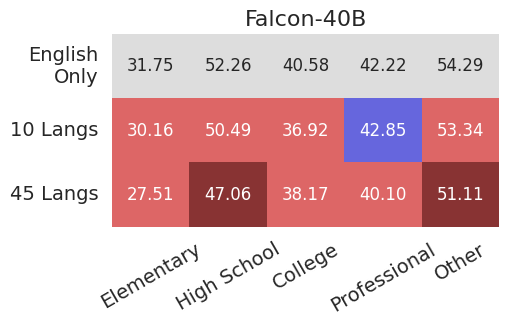

In [605]:
def format_level(level):
    return level.replace('_', ' ').title()

sns.set(rc={'figure.figsize':(5,2.5)})
ax = sns.heatmap(sigbin_df + sign_df, cmap=my_cm, vmin=-1, vmax=3, annot=avg_40b_df, fmt='.2f', cbar=False)
plt.yticks([0.5,1.5,2.5], ['English\nOnly','10 Langs','45 Langs'])
plt.ylabel('')
plt.xlabel('')
plt.xticks([0.5,1.5,2.5,3.5,4.5], map(format_level, sigbin_df.columns.tolist()), rotation=30, fontsize=14)
plt.yticks(fontsize=14)
plt.title('Falcon-40B', fontsize=16)
plt.savefig('mmlu_level_significance_40b.pdf', bbox_inches='tight')
plt.show()